<a href="https://colab.research.google.com/github/anaruzz/Sentiment-Analysis-on-IMDB-dataset/blob/main/Sentiment_analysis_on_IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment Analysis of IMDB movie reviews

## Problem specification

The goal of the project is to classify movie reviews data from the IMDB dataset and perform sentiment analysis on them in order to investigate the sentiment polarity of the movie reviews and identify the most commonly used words or phrases in positive and negative reviews.

## Data collection

Source of data: https://www.kaggle.com/datasets/darshan1504/imdb-movie-reviews-2021

originally the Dataset is a .db file so I converted it to a csv file.

In [3]:
from google.colab import files

input = files.upload()

Saving REVIEWS.csv to REVIEWS.csv


In [48]:
import pandas as pd


input_df = pd.read_csv("REVIEWS.csv")

input_df

,ID,REVIEW,RATING,AUTHOR,TITLE
0,1,I don't get all the terrible reviews for this ...,5,margarida-44311,Not Bad\n
1,2,I cannot believe anyone could give this film l...,8,joemay-2,What are all the bad reviews about is it a wo...
2,3,Great White is not the worst way to spend 90 m...,4,nebk,Great White=Jaws Lite\n
3,4,Great White is as basic of a killer shark film...,4,kuarinofu,Bare-bones killer shark film\n
4,5,"Terrible story, dialogue and CGI. The film has...",4,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI\n"
...,...,...,...,...,...
5445,5446,"It's master piece by Zack please part 2,3,4 al...",10,suryajijvania,More Parts\n
5446,5447,No words to describe. It's awesome. One of the...,10,shishirkmr-82243,It's a fantastic movie\n
5447,5448,Far better than previous one and better editin...,10,moizsyed-07601,Awesome out standing!\n
5448,5449,Why did the studio say no to this masterpiece?...,10,samun_shrestha,EPIC\n


In [ ]:
pd.set_option('display.max_colwidth', None)

In [49]:
input_df

,ID,REVIEW,RATING,AUTHOR,TITLE
0,1,I don't get all the terrible reviews for this ...,5,margarida-44311,Not Bad\n
1,2,I cannot believe anyone could give this film l...,8,joemay-2,What are all the bad reviews about is it a wo...
2,3,Great White is not the worst way to spend 90 m...,4,nebk,Great White=Jaws Lite\n
3,4,Great White is as basic of a killer shark film...,4,kuarinofu,Bare-bones killer shark film\n
4,5,"Terrible story, dialogue and CGI. The film has...",4,Horror_Flick_Fanatic,"Terrible story, dialogue, and CGI\n"
...,...,...,...,...,...
5445,5446,"It's master piece by Zack please part 2,3,4 al...",10,suryajijvania,More Parts\n
5446,5447,No words to describe. It's awesome. One of the...,10,shishirkmr-82243,It's a fantastic movie\n
5447,5448,Far better than previous one and better editin...,10,moizsyed-07601,Awesome out standing!\n
5448,5449,Why did the studio say no to this masterpiece?...,10,samun_shrestha,EPIC\n


## Exploratory Data Analysis

In [50]:
input_df.isnull().sum()

ID        0
REVIEW    0
RATING    0
AUTHOR    0
TITLE     0
dtype: int64

In [51]:
input_df.dtypes

ID         int64
REVIEW    object
RATING    object
AUTHOR    object
TITLE     object
dtype: object

In [52]:
input_df['RATING'].value_counts()

1                                       1034
10                                       679
8                                        570
2                                        544
7                                        532
9                                        438
3                                        436
6                                        377
4                                        364
5                                        358
unknown_value_please_contact_support     118
Name: RATING, dtype: int64

In [53]:
unknown_rows = input_df[input_df['RATING'] == 'unknown_value_please_contact_support']
print(unknown_rows)

        ID                                             REVIEW  \
27      28  This was so dreadful it's worth watching to la...   
29      30  A seaplane operator couple and their passenger...   
102    103  So much of the movie in Spanish we needed subt...   
114    115  This movie is a good for pass ur time ...........   
202    203  This film makes you see drug use very differen...   
...    ...                                                ...   
5300  5301  I watched this one night because i actullay en...   
5310  5311  ~Spoiler~Wrong Turn was a terrific sleeper hit...   
5362  5363  Wrong Turn 2 (2007) ** 1/2 (out of 4) A group ...   
5370  5371  Wrong Turn Part 1 was a good gory movie, with ...   
5388  5389  A couple of game show contestants are sent int...   

                                    RATING            AUTHOR  \
27    unknown_value_please_contact_support             JICNZ   
29    unknown_value_please_contact_support         amesmonde   
102   unknown_value_please_

In [54]:
# Delete rows that have 'unknown_value_please_contact_support' as value for rating
input_df = input_df[input_df['RATING'] != 'unknown_value_please_contact_support']
input_df['RATING'].value_counts()

1     1034
10     679
8      570
2      544
7      532
9      438
3      436
6      377
4      364
5      358
Name: RATING, dtype: int64

In [55]:
rating_mean = input_df['RATING'].mean()
rating_mean

inf

In [60]:
input_df['RATING'] = input_df['RATING'].astype(int)
input_df.dtypes

<ipython-input-60-83ae3a454129>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ID         int64
REVIEW    object
RATING     int64
AUTHOR    object
TITLE     object
dtype: object

In [61]:
input_df['RATING'].describe()

count    5332.000000
mean        5.242686
std         3.207685
min         1.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: RATING, dtype: float64

### Data Visualisation

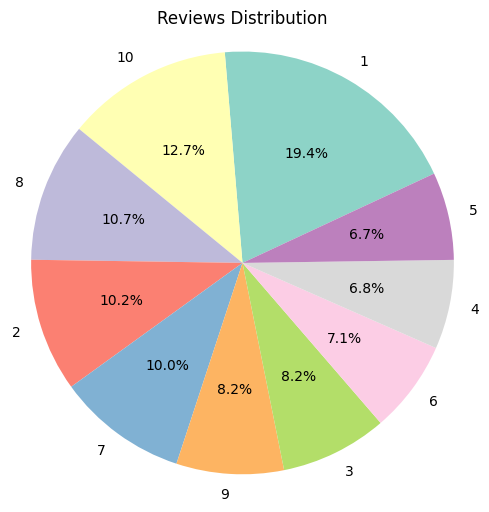

In [62]:
import matplotlib.pyplot as plt


data_stats = input_df['RATING'].value_counts()

plt.figure(figsize=(6,6))
#print(len(data_stats))
#colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']
plt.pie(data_stats, labels=data_stats.index, autopct='%1.1f%%', startangle=25, colors=plt.cm.Set3(range(10)))
plt.axis('equal')
plt.title('Reviews Distribution')

plt.show()

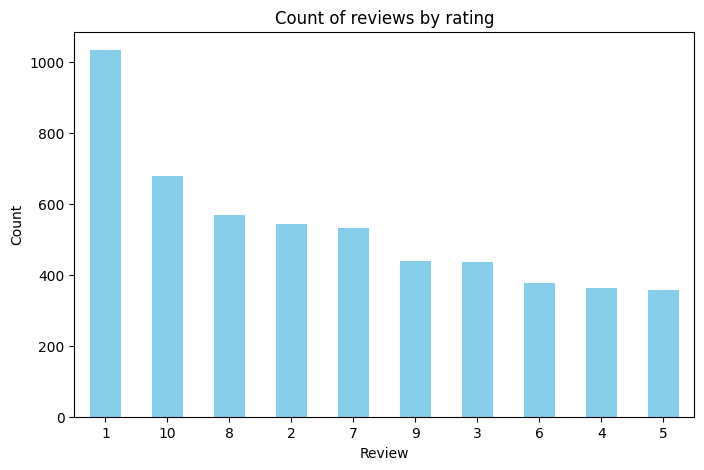

In [63]:
data_stats.plot(x=data_stats.index, y=data_stats.values, kind='bar', figsize=(8, 5), color='skyblue')
plt.title("Count of reviews by rating")
plt.ylabel('Count')
plt.xlabel('Review')
plt.xticks(rotation=0)
plt.show()

Create Sentiment Categories column

In [64]:
# 1-3 => Negative
# 4-6 => Neutral
# 7-10 => Positive

input_df['Sentiment'] = ''
input_df.loc[input_df['RATING'] >= 7, 'Sentiment'] = 'Positive'
input_df.loc[input_df['RATING'] <= 3, 'Sentiment'] = 'Negative'
input_df.loc[(input_df['RATING'] >= 4) & (input_df['RATING'] <= 6), 'Sentiment'] = 'Neutral'


sentiment_counts = input_df['Sentiment'].value_counts()
sentiment_counts

<ipython-input-64-549e1b48a778>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Positive    2219
Negative    2014
Neutral     1099
Name: Sentiment, dtype: int64

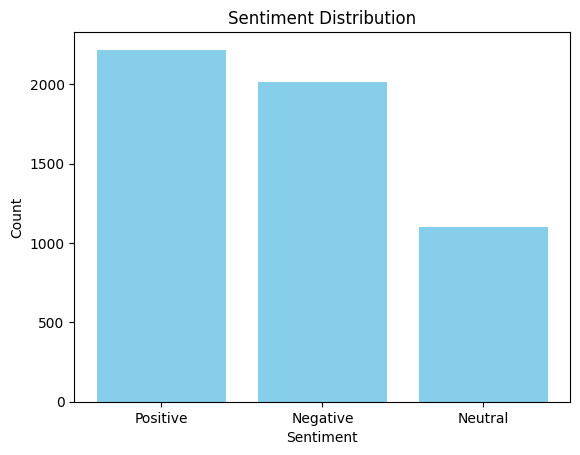

In [65]:
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

### Data Pre-processing



*   remove columns ID , AUTHOR, Rating : New df     => Done
*   Concatenate review and title columns            => Done
*   text pre-processing:
          *   expand contractions
          *   clean text
          *   remove persons names
          *   remove stop words
          *   tokenization
          *   vectorization
          *   most common words



In [66]:
data = input_df.drop(['ID', 'AUTHOR', 'RATING'], axis=1)
data

,REVIEW,TITLE,Sentiment
0,I don't get all the terrible reviews for this ...,Not Bad\n,Neutral
1,I cannot believe anyone could give this film l...,What are all the bad reviews about is it a wo...,Positive
2,Great White is not the worst way to spend 90 m...,Great White=Jaws Lite\n,Neutral
3,Great White is as basic of a killer shark film...,Bare-bones killer shark film\n,Neutral
4,"Terrible story, dialogue and CGI. The film has...","Terrible story, dialogue, and CGI\n",Neutral
...,...,...,...
5445,"It's master piece by Zack please part 2,3,4 al...",More Parts\n,Positive
5446,No words to describe. It's awesome. One of the...,It's a fantastic movie\n,Positive
5447,Far better than previous one and better editin...,Awesome out standing!\n,Positive
5448,Why did the studio say no to this masterpiece?...,EPIC\n,Positive


In [67]:
data['Text'] = data['REVIEW'] + ' ' + data['TITLE']
data

,REVIEW,TITLE,Sentiment,Text
0,I don't get all the terrible reviews for this ...,Not Bad\n,Neutral,I don't get all the terrible reviews for this ...
1,I cannot believe anyone could give this film l...,What are all the bad reviews about is it a wo...,Positive,I cannot believe anyone could give this film l...
2,Great White is not the worst way to spend 90 m...,Great White=Jaws Lite\n,Neutral,Great White is not the worst way to spend 90 m...
3,Great White is as basic of a killer shark film...,Bare-bones killer shark film\n,Neutral,Great White is as basic of a killer shark film...
4,"Terrible story, dialogue and CGI. The film has...","Terrible story, dialogue, and CGI\n",Neutral,"Terrible story, dialogue and CGI. The film has..."
...,...,...,...,...
5445,"It's master piece by Zack please part 2,3,4 al...",More Parts\n,Positive,"It's master piece by Zack please part 2,3,4 al..."
5446,No words to describe. It's awesome. One of the...,It's a fantastic movie\n,Positive,No words to describe. It's awesome. One of the...
5447,Far better than previous one and better editin...,Awesome out standing!\n,Positive,Far better than previous one and better editin...
5448,Why did the studio say no to this masterpiece?...,EPIC\n,Positive,Why did the studio say no to this masterpiece?...


In [68]:
data = data.drop(['REVIEW', 'TITLE'], axis=1)
data

,Sentiment,Text
0,Neutral,I don't get all the terrible reviews for this ...
1,Positive,I cannot believe anyone could give this film l...
2,Neutral,Great White is not the worst way to spend 90 m...
3,Neutral,Great White is as basic of a killer shark film...
4,Neutral,"Terrible story, dialogue and CGI. The film has..."
...,...,...
5445,Positive,"It's master piece by Zack please part 2,3,4 al..."
5446,Positive,No words to describe. It's awesome. One of the...
5447,Positive,Far better than previous one and better editin...
5448,Positive,Why did the studio say no to this masterpiece?...


In [ ]:
pd.set_option('display.max_colwidth', None)

In [69]:
data = data[['Text', 'Sentiment']]
data.head(50)

,Text,Sentiment
0,I don't get all the terrible reviews for this ...,Neutral
1,I cannot believe anyone could give this film l...,Positive
2,Great White is not the worst way to spend 90 m...,Neutral
3,Great White is as basic of a killer shark film...,Neutral
4,"Terrible story, dialogue and CGI. The film has...",Neutral
5,Whilst the 'shark survival' sub genre has plen...,Neutral
6,Much better than the ratings suggest. Its on p...,Positive
7,"First of all I love the film locations, drone ...",Neutral
8,The film is meh when it comes to these types o...,Neutral
9,Thought it was a great Shark Movie . Special e...,Positive


In [70]:
import re

def expand_contractions(text):
  text = text.lower()
  text = re.sub(r"what's", "what is", text)
  text = re.sub(r"let's", "let us", text)

  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"don't", "do not", text)
  text = re.sub(r"n't", " not", text)
  text = re.sub(r"\'s", " is", text)
  text = re.sub(r"i'm", "i am", text)
  #text = re.sub(r"n't", " not", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'ll", " will", text)
  #text = text.replace('\xa0', ' ')

  return text

a = "“Worry's a down payment on a problem you may never have and we're about to leave so let's go'.  Joyce Meyer.  #motivation #leadership #worry"
expand_contractions(a)

"“worry is a down payment on a problem you may never have and we are about to leave so let us go'.  joyce meyer.  #motivation #leadership #worry"

In [71]:
data['Text'] = data['Text'].map(lambda row : expand_contractions(row))
data

,Text,Sentiment
0,i do not get all the terrible reviews for this...,Neutral
1,i cannot believe anyone could give this film l...,Positive
2,great white is not the worst way to spend 90 m...,Neutral
3,great white is as basic of a killer shark film...,Neutral
4,"terrible story, dialogue and cgi. the film has...",Neutral
...,...,...
5445,"it is master piece by zack please part 2,3,4 a...",Positive
5446,no words to describe. it is awesome. one of th...,Positive
5447,far better than previous one and better editin...,Positive
5448,why did the studio say no to this masterpiece?...,Positive


In [72]:
def clean_text(text):
  #text = text.lower()

  text = text.replace('.', ' ')

  #Remove special characters
  text = re.sub(r'[^\w\s]', '', text)

  #Remove numbers
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

  # Remove trailing whitespace
  text = re.sub(' +', ' ', text)
  #print(text)


  #result = text.replace('  ', ' ')
  return text


b = "isthataspider dhodgs i will 123 45645 5 +- )fight this guy! Don't insult! , + ??, the lions like that! But seriously  -- George S. Patton they kinda are.Wasted some of the best players"

clean_text(b)

'isthataspider dhodgs i will fight this guy Dont insult the lions like that But seriously George S Patton they kinda are Wasted some of the best players'

In [73]:
data['Text'] = data['Text'].map(lambda row : clean_text(row))
data

,Text,Sentiment
0,i do not get all the terrible reviews for this...,Neutral
1,i cannot believe anyone could give this film l...,Positive
2,great white is not the worst way to spend minu...,Neutral
3,great white is as basic of a killer shark film...,Neutral
4,terrible story dialogue and cgi the film has a...,Neutral
...,...,...
5445,it is master piece by zack please part also ma...,Positive
5446,no words to describe it is awesome one of the ...,Positive
5447,far better than previous one and better editin...,Positive
5448,why did the studio say no to this masterpiece ...,Positive


In [74]:
import spacy

def remove_persons_names(text):
  nlp = spacy.load('en_core_web_sm')
  doc = nlp(text)
  cleaned_text = ' '.join([token.text for token in doc if token.ent_type_ != 'PERSON'])

  #result = cleaned_text.replace('  ', ' ')

  return cleaned_text


b = "@isthataspider @dhodgs i will 123 45645 5 +- )fight this guy! Don't insult! , + ??, Ghofrane please the lions like that! But seriously  -- George S. Patton they kinda are.Wasted some of the best players"


print('original: \n' + b)
b = expand_contractions(b)
b = clean_text(b)
b = remove_persons_names(b)
print('remove person names: \n' + b)



original: 
@isthataspider @dhodgs i will 123 45645 5 +- )fight this guy! Don't insult! , + ??, Ghofrane please the lions like that! But seriously  -- George S. Patton they kinda are.Wasted some of the best players
remove person names: 
isthataspider dhodgs i will fight this guy do not insult ghofrane please the lions like that but seriously they kinda are wasted some of the best players


In [75]:
data['Text'] = data['Text'].map(lambda row : remove_persons_names(row))
data

,Text,Sentiment
0,i do not get all the terrible reviews for this...,Neutral
1,i can not believe anyone could give this film ...,Positive
2,great white is not the worst way to spend minu...,Neutral
3,great white is as basic of a killer shark film...,Neutral
4,terrible story dialogue and cgi the film has a...,Neutral
...,...,...
5445,it is master piece by zack please part also ma...,Positive
5446,no words to describe it is awesome one of the ...,Positive
5447,far better than previous one and better editin...,Positive
5448,why did the studio say no to this masterpiece ...,Positive


In [76]:
# Remove stop words
from gensim.parsing.preprocessing import remove_stopwords

data['Text'] = data['Text'].map(lambda review : remove_stopwords(review))
data['Text']

0       terrible reviews movie especially lots people ...
1       believe film gave thought acted great filming ...
2       great white worst way spend minutes issues fil...
3       great white basic killer shark film possible e...
4       terrible story dialogue cgi film predictable o...
                              ...                        
5445                 master piece zack man steel nd parts
5446         words awesome best superhero fantastic movie
5447    far better previous better editing graphics aw...
5448    studio masterpiece like seriously mean like ne...
5449    overall opinion competitors marvel organised w...
Name: Text, Length: 5332, dtype: object

In [77]:
# Tokenize
def tokenize(text):
  return text.split()

data['Text'] = data['Text'].map(lambda row: tokenize(row))
data

,Text,Sentiment
0,"[terrible, reviews, movie, especially, lots, p...",Neutral
1,"[believe, film, gave, thought, acted, great, f...",Positive
2,"[great, white, worst, way, spend, minutes, iss...",Neutral
3,"[great, white, basic, killer, shark, film, pos...",Neutral
4,"[terrible, story, dialogue, cgi, film, predict...",Neutral
...,...,...
5445,"[master, piece, zack, man, steel, nd, parts]",Positive
5446,"[words, awesome, best, superhero, fantastic, m...",Positive
5447,"[far, better, previous, better, editing, graph...",Positive
5448,"[studio, masterpiece, like, seriously, mean, l...",Positive


In [78]:
from collections import Counter


positive_df = data[data['Sentiment'] == 'Positive']
negative_df = data[data['Sentiment'] == 'Negative']
neutral_df = data[data['Sentiment'] == 'Neutral']

positive_words = [word for review in positive_df['Text'] for word in review]
negative_words = [word for review in negative_df['Text'] for word in review]
neutral_words = [word for review in neutral_df['Text'] for word in review]

# Word frequency count
positive_word_count = Counter(positive_words)
negative_word_count = Counter(negative_words)
neutral_word_count = Counter(neutral_words)


num_common_words = 10  # Number of words to display

most_common_positive_words = positive_word_count.most_common(num_common_words)
most_common_negative_words = negative_word_count.most_common(num_common_words)
most_common_neutral_words = neutral_word_count.most_common(num_common_words)

print('Most common words in positive reviews:')
print(most_common_positive_words)

print('Most common words in negative reviews:')
print(most_common_negative_words)

print('Most common words in neutral reviews:')
print(most_common_neutral_words)

Most common words in positive reviews:
[('movie', 3188), ('film', 2050), ('good', 1222), ('like', 1017), ('great', 995), ('story', 925), ('watch', 676), ('time', 604), ('people', 536), ('acting', 525)]
Most common words in negative reviews:
[('movie', 2262), ('film', 973), ('like', 816), ('bad', 759), ('time', 626), ('good', 524), ('story', 489), ('watch', 434), ('movies', 401), ('acting', 397)]
Most common words in neutral reviews:
[('movie', 1654), ('film', 1131), ('like', 758), ('good', 619), ('story', 529), ('time', 353), ('characters', 350), ('great', 330), ('watch', 317), ('bad', 312)]


Train / Test Data split

In [79]:
from sklearn.model_selection import train_test_split

X = data["Text"]
y = data["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train: {}'.format(X_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_train: {}'.format(y_train.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (4265,)
X_test: (1067,)
y_train: (4265,)
y_test: (1067,)


In [80]:
X_train_strings = [' '.join(text) for text in X_train]
X_test_strings = [' '.join(text) for text in X_test]

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_strings)
X_test_vectorized = vectorizer.transform(X_test_strings)
X_train_vectorized

<4265x19812 sparse matrix of type '<class 'numpy.float64'>'
	with 171886 stored elements in Compressed Sparse Row format>

### Model: Naive Bayes

In [82]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [83]:
from sklearn.metrics import accuracy_score

y_pred = naive_bayes_model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7300843486410497


In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.81      0.89      0.85       412
     Neutral       0.68      0.24      0.35       212
    Positive       0.77      0.93      0.84       443

    accuracy                           0.78      1067
   macro avg       0.75      0.69      0.68      1067
weighted avg       0.76      0.78      0.75      1067



### Model: Support Vector Machines

In [85]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_vectorized, y_train)

SVC()

In [86]:
y_pred = svm_model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7778819119025304


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.81      0.89      0.85       412
     Neutral       0.68      0.24      0.35       212
    Positive       0.77      0.93      0.84       443

    accuracy                           0.78      1067
   macro avg       0.75      0.69      0.68      1067
weighted avg       0.76      0.78      0.75      1067



### Dash App

In [89]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
def preprocess_text(text):
    text = text.lower()

    text = expand_contractions(text)
    text = clean_text(text)
    return text

In [92]:
import jupyter_dash
import dash
import dash_html_components as html
import pandas as pd
from dash import dash_table
import dash_core_components as dcc
from dash.dependencies import Input, Output

input_df = pd.read_csv("REVIEWS.csv")

input_df = input_df[input_df['RATING'] != 'unknown_value_please_contact_support']

input_df['Sentiment'] = ''
input_df['RATING'] = pd.to_numeric(input_df['RATING'], errors='coerce')

input_df.loc[input_df['RATING'] >= 7, 'Sentiment'] = 'Positive'
input_df.loc[input_df['RATING'] <= 3, 'Sentiment'] = 'Negative'
input_df.loc[(input_df['RATING'] > 3) & (input_df['RATING'] < 7), 'Sentiment'] = 'Neutral'

sentiment_counts = input_df['Sentiment'].value_counts()


app = jupyter_dash.JupyterDash(__name__)

app.title = "Sentiment Analysis"

app.layout = html.Div([
    html.H1('Sentiment Analysis using the IMDB review dataset'),
    html.H3('Input data'),
    html.Hr(),

    dash_table.DataTable(
        data=input_df.to_dict("records"),
        columns=[{"name": col, "id": col} for col in input_df.columns],
        style_table={"overflowX": "auto"},
        style_cell_conditional=[
            {'if': {'column_id': 'REVIEW'},
             'maxWidth': '600px',
             'overflow': 'hidden',
             'textOverflow': 'ellipsis'}
        ],
        page_size=10
    ),

    dcc.Graph(
        id='sentiment-distribution',
        figure={
            'data': [{
                'x': sentiment_counts.index,
                'y': sentiment_counts.values,
                'type': 'bar',
                'marker': {'color': 'skyblue'}
            }],
            'layout': {
                'xaxis': {'title': 'Sentiment'},
                'yaxis': {'title': 'Count'},
                'title': 'Sentiment Distribution'
            }
        }
    ),

    dcc.Textarea(
        id='input-text',
        placeholder='Enter a text to predict...',
        value='',
        style={'width': '100%', 'height': '70px'}
    ),
    dcc.Dropdown(
        id='model-dropdown',
        options=[
            {'label': 'Naive Bayes', 'value': 'naive_bayes'},
            {'label': 'Support Vector Machines', 'value': 'svm'}
        ],
        value='naive_bayes',
        style={'width': '200px'}
    ),
    html.Button('Predict', id='predict-button', n_clicks=0),
    html.Div(id='output-text')
])

@app.callback(
    Output('output-text', 'children'),
    Input('predict-button', 'n_clicks'),
    Input('input-text', 'value'),
    Input('model-dropdown', 'value')
)


def predict_sentiment(n_clicks, input_text, model):
    if n_clicks > 0:
        preprocessed_text = preprocess_text(input_text)

        input_vectorized = vectorizer.transform([preprocessed_text])

        # Load models
        if model == 'naive_bayes':
            selected_model = naive_bayes_model
        elif model == 'svm':
            selected_model = svm_model

        prediction = selected_model.predict(input_vectorized)[0]

        return f'Predicted Sentiment: {prediction}'

    return ''

if __name__ == '__main__':
    app.run_server(mode='external') # external for link, inline for output in colab

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



Dash app running on:


<IPython.core.display.Javascript object>